<a href="https://colab.research.google.com/github/Wipada6430205202/myproject4/blob/main/Project_Tilapia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Inventory

In [28]:
import numpy as np
from scipy.optimize import minimize
from scipy.integrate import quad

# กำหนดค่าพารามิเตอร์
Ws = 500
W0 = 20
t0 = -0.733
a = 0.012
b = 3.14
K = 0.0109212751885572
Theta = 0.8
Cp = 0.16
Cf = 0.025
Ch = 0.00325
Cm = 0.007
CC = 1000
Dp = 10  # ค่าคงที่ของ D(p)

# ฟังก์ชันสำหรับอินทิกรัล
def integrand_I1(t, y, Ws, b, K, t0, Theta):
    return np.exp(Theta * t) * b * Ws * K * np.exp(-K * (t - t0)) * (1 - np.exp(-K * ( t- t0)))**(b - 1)

def integrand_I2(t, Ws, b, K, t0, Theta, Dp):
    return np.exp(Theta * t) * (-Dp + b * Ws * K * np.exp(-K * (t - t0)) * (1 - np.exp(-K * (t - t0)))**(b - 1))

# ฟังก์ชัน I1 และ I2
def I1(t1, y, Ws, b, K, t0, Theta):
    result, _ = quad(integrand_I1, 0, t1, args=(t1, Ws, b, K, t0, Theta))
    return np.exp(-Theta * t) * result + y * W0

def I2(t1, T, Ws, b, K, t0, Theta, Dp):
    result, _ = quad(integrand_I2, t1, T, args=(Ws, b, K, t0, Theta, Dp))
    return np.exp(-Theta * T) * result + (Dp - b * Ws * K * np.exp(-K * (T - t0)) * (1 - np.exp(-K * (T - t0)))**(b - 1)) * (T - t1)

# ทดสอบการคำนวณ I1 และ I2
print("I1(240, 300):", I1(240, 300, Ws, b, K, t0, Theta))
print("I2(240, 365):", I2(240, 365, Ws, b, K, t0, Theta, Dp))


NameError: name 't' is not defined

In [38]:

# กำหนดค่าพารามิเตอร์
Ws = 500
W0 = 20
t0 = -0.733
b = 3.14
K = 0.0109212751885572
Theta = 0.2
Dp = 10  # ค่าคงที่ของ D(p)
y = 300  # ตัวอย่างค่าของ y

# ฟังก์ชันสำหรับอินทิกรัล I1 และ I2
def integrand_I1(t, Ws, b, K, t0, Theta):
    return np.exp(Theta * t) * b * Ws * K * np.exp(-K * (t - t0)) * (1 - np.exp(-K * (t - t0)))**(b - 1)

def integrand_I2(t, Ws, b, K, t0, Theta, Dp):
    return np.exp(Theta * t) * (-Dp + b * Ws * K * np.exp(-K * (t - t0)) * (1 - np.exp(-K * (t - t0)))**(b - 1))

# ฟังก์ชัน I1 และ I2 ตามสมการที่ให้มา
def I1(t1, y, Ws, b, K, t0, Theta):
    result, _ = quad(integrand_I1, 0, t1, args=(Ws, b, K, t0, Theta))
    return result + y * W0

def I2(t1, T, Ws, b, K, t0, Theta, Dp):
    result, _ = quad(integrand_I2, t1, T, args=(Ws, b, K, t0, Theta, Dp))
    term2 = (Dp - b * Ws * K * np.exp(-K * (T - t0)) * (1 - np.exp(-K * (T - t0)))**(b - 1)) * (T - t1)
    return np.exp(-Theta * T) * result + term2

# ตัวอย่างการใช้ฟังก์ชัน I1 และ I2
t1_example = 240
T_example = 365

I1_value = I1(t1_example, y, Ws, b, K, t0, Theta)
I2_value = I2(t1_example, T_example, Ws, b, K, t0, Theta, Dp)

print(f"I1(t1={t1_example}): {I1_value}")
print(f"I2(t1={t1_example}, T={T_example}): {I2_value}")
print("-Theta * t1 = ",np.exp(-Theta * t1_example))


I1(t1=240): 3.8711520306151655e+21
I2(t1=240, T=365): 1163.65996204151
-Theta * t1 =  1.4251640827409352e-21


In [56]:

# กำหนดค่าพารามิเตอร์
Ws = 500
W0 = 20
t0 = -0.5
b = 5
K = 50   #0.0109212751885572
Theta = 0.2
Dp = 5  # ค่าคงที่ของ D(p)
y = 300  # ตัวอย่างค่าของ y

# ฟังก์ชันสำหรับอินทิกรัล I1 และ I2
def integrand_I1(t, Ws, b, K, t0, Theta):
    return np.exp(Theta * t) * b * Ws * K * np.exp(-K * (t - t0)) * (1 - np.exp(-K * (t - t0)))**(b - 1)

def integrand_I2(t, Ws, b, K, t0, Theta, Dp):
    return np.exp(Theta * t) * (-Dp + b * Ws * K * np.exp(-K * (t - t0)) * (1 - np.exp(-K * (t - t0)))**(b - 1))

# ฟังก์ชัน I1 และ I2 ตามสมการที่ให้มา
def I1(t1, y, Ws, b, K, t0, Theta):
    result, _ = quad(integrand_I1, 0, t1, args=(Ws, b, K, t0, Theta))
    return result*(np.exp(-Theta * t1)) + y * W0

def I2(t1, T, Ws, b, K, t0, Theta, Dp):
    result, _ = quad(integrand_I2, t1, T, args=(Ws, b, K, t0, Theta, Dp))
    term2 = (Dp - b * Ws * K * np.exp(-K * (T - t0)) * (1 - np.exp(-K * (T - t0)))**(b - 1)) * (T - t1)
    return np.exp(-Theta * T) * result + term2

# ตัวอย่างการใช้ฟังก์ชัน I1 และ I2
t1_example = 240
T_example = 365

I1_value = I1(t1_example, y, Ws, b, K, t0, Theta)
I2_value = I2(t1_example, T_example, Ws, b, K, t0, Theta, Dp)

print(f"I1(t1={t1_example}): {I1_value}")
print(f"I2(t1={t1_example}, T={T_example}): {I2_value}")
print("-Theta * t1 = ",np.exp(-Theta * t1_example))


I1(t1=240): 6000.0
I2(t1=240, T=365): 600.0000000003471
-Theta * t1 =  1.4251640827409352e-21


In [ ]:
# กำหนดค่าพารามิเตอร์
Ws = 500
W0 = 20
t0 = -0.733
b = 3.14
K = 0.0109212751885572
Theta = 0.2
Dp = 10  # ค่าคงที่ของ D(p)
y = 300  # ตัวอย่างค่าของ y

# ฟังก์ชันสำหรับอินทิกรัล I1 และ I2
def integrand_I1(t, Ws, b, K, t0, Theta):
    return np.exp(Theta * t) * b * Ws * K * np.exp(-K * (t - t0)) * (1 - np.exp(-K * (t - t0)))**(b - 1)

def integrand_I2(t, Ws, b, K, t0, Theta, Dp):
    return np.exp(Theta * t) * (-Dp + b * Ws * K * np.exp(-K * (t - t0)) * (1 - np.exp(-K * (t - t0)))**(b - 1))

# ฟังก์ชัน I1 และ I2 ตามสมการที่ให้มา
def I1(t1, y, Ws, b, K, t0, Theta):
    result, _ = quad(integrand_I1, 0, t1, args=(Ws, b, K, t0, Theta))
    return np.exp(-Theta * t1) * result + y * W0

def I2(t1, T, Ws, b, K, t0, Theta, Dp):
    result, _ = quad(integrand_I2, t1, T, args=(Ws, b, K, t0, Theta, Dp))
    term2 = (Dp - b * Ws * K * np.exp(-K * (T - t0)) * (1 - np.exp(-K * (T - t0)))**(b - 1)) * (T - t1)
    return np.exp(-Theta * T) * result + term2

# ตัวอย่างการใช้ฟังก์ชัน I1 และ I2
t1_example = 240
T_example = 365

I1_value = I1(t1_example, y, Ws, b, K, t0, Theta)
I2_value = I2(t1_example, T_example, Ws, b, K, t0, Theta, Dp)

print(f"I1(t1={t1_example}): {I1_value}")
print(f"I2(t1={t1_example}, T={T_example}): {I2_value}")

I1(t1=240): 6005.517026832862
I2(t1=240, T=365): 1163.65996204151


# Cost & Optimal

In [ ]:
Cp = 0.16
Cf = 0.025
Ch = 0.00325
Cm = 0.007
CC = 1000
# ฟังก์ชันการให้อาหาร (Feeding function)
def feeding_function(t):
    return 4 if t <= 28 else 3 if t <= 52 else 1.5

# ฟังก์ชันค่าใช้จ่ายรวม (Total Cost, TC)
def total_cost(params):
    T, t1,y = params

    # ค่าใช้จ่ายในการสั่งซื้อ
    PC = Cp * y * W0

    # ค่าใช้จ่ายในการให้อาหาร
    FC1 = Cf * (quad(lambda t: 4 * I1(t, y, Ws, b, K, t0, Theta), 0, 28)[0] +
                quad(lambda t: 3 * I1(t, y, Ws, b, K, t0, Theta), 29, 52)[0] +
                quad(lambda t: 1.5 * I1(t, y, Ws, b, K, t0, Theta), 53, t1)[0])
    FC2 = Cf * quad(lambda t: feeding_function(t) * I2(t1, T, Ws, b, K, t0, Theta, Dp), t1, T)[0]

    # ค่าใช้จ่ายในการเก็บรักษา
    HC1 = Ch * quad(lambda t: I1(t, y, Ws, b, K, t0, Theta), 0, t1)[0]
    HC2 = Ch * quad(lambda t: I2(t1, T, Ws, b, K, t0, Theta, Dp), t1, T)[0]

    # ค่าใช้จ่ายจากการตาย
    MC1 = Theta * Cm * quad(lambda t: I1(t, y, Ws, b, K, t0, Theta), 0, t1)[0]
    MC2 = Theta * Cm * quad(lambda t: I2(t1, T, Ws, b, K, t0, Theta, Dp), t1, T)[0]

    # ค่าใช้จ่ายรวม
    total_cost = PC + FC1 + HC1 + MC1 + FC2 + HC2 + MC2 + CC
    return total_cost

# กำหนดค่าเริ่มต้นและขอบเขต
initial_guess = [250, 100 ,10]
bounds = [(t1, None), (240, 365),(300,None)]  # T อยู่ในช่วง [200, 365], t1 อยู่ในช่วง [0, 200], y >=100

# ใช้ scipy.optimize เพื่อหาค่าที่เหมาะสม
result = minimize(total_cost, initial_guess, bounds=bounds, method='L-BFGS-B')

# แสดงผลลัพธ์
print("Optimal Parameters:")
print("T:", result.x[0])
print("t1:", result.x[1])
print("y:", result.x[2])
print("Minimum Total Cost:", result.fun)


Optimal Parameters:
T: 240.0436506945112
t1: 240.0
y: 300.0
Minimum Total Cost: 92929.00003984742


##กราฟ Total Cost vs. t1

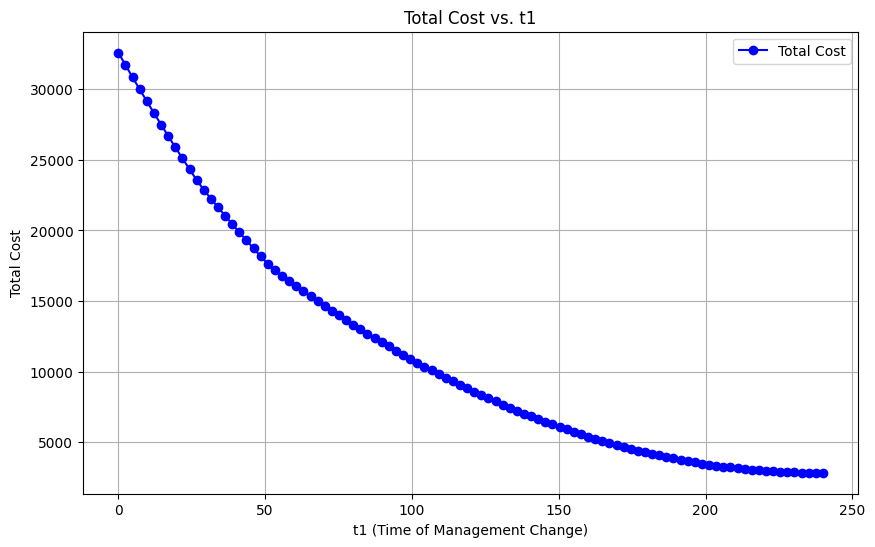

In [ ]:
import matplotlib.pyplot as plt
def calculate_costs(t1, T, y):
    # ค่าใช้จ่ายในการสั่งซื้อ
    PC = Cp * y * W0

    # ค่าใช้จ่ายในการให้อาหาร
    FC1 = Cf * (quad(lambda t: 4 * I1(t, y, Ws, b, K, t0, Theta), 0, 28)[0] +
                quad(lambda t: 3 * I1(t, y, Ws, b, K, t0, Theta), 28, 52)[0] +
                quad(lambda t: 1.5 * I1(t, y, Ws, b, K, t0, Theta), 52, t1)[0])
    FC2 = Cf * quad(lambda t: feeding_function(t) * I2(t1, T, Ws, b, K, t0, Theta, Dp), t1, T)[0]
    FC = FC1 + FC2

    # ค่าใช้จ่ายในการเก็บรักษา
    HC1 = Ch * quad(lambda t: I1(t, y, Ws, b, K, t0, Theta), 0, t1)[0]
    HC2 = Ch * quad(lambda t: I2(t1, T, Ws, b, K, t0, Theta, Dp), t1, T)[0]
    HC = HC1 + HC2

    # ค่าใช้จ่ายจากการตาย
    MC1 = Theta * Cm * quad(lambda t: I1(t, y, Ws, b, K, t0, Theta), 0, t1)[0]
    MC2 = Theta * Cm * quad(lambda t: I2(t1, T, Ws, b, K, t0, Theta, Dp), t1, T)[0]
    MC = MC1 + MC2

    return PC, FC, HC, MC
# กำหนดช่วงของ t1 ที่ต้องการพิจารณา
t1_values = np.linspace(0, 240, 100)  # ตั้งแต่ t1 = 0 ถึง t1 = T

# คำนวณต้นทุนรวมสำหรับแต่ละค่า t1
total_cost_values = []

for t1 in t1_values:
    PC, FC, HC, MC = calculate_costs(t1, T, y)
    total_cost = PC + FC + HC + MC
    total_cost_values.append(total_cost)

# พล็อตกราฟต้นทุนรวมกับ t1
plt.figure(figsize=(10, 6))
plt.plot(t1_values, total_cost_values, label='Total Cost', marker='o', color='blue')
plt.xlabel('t1 (Time of Management Change)')
plt.ylabel('Total Cost')
plt.title('Total Cost vs. t1')
plt.legend()
plt.grid(True)
plt.show()


##กราฟ Cost Components vs. t1

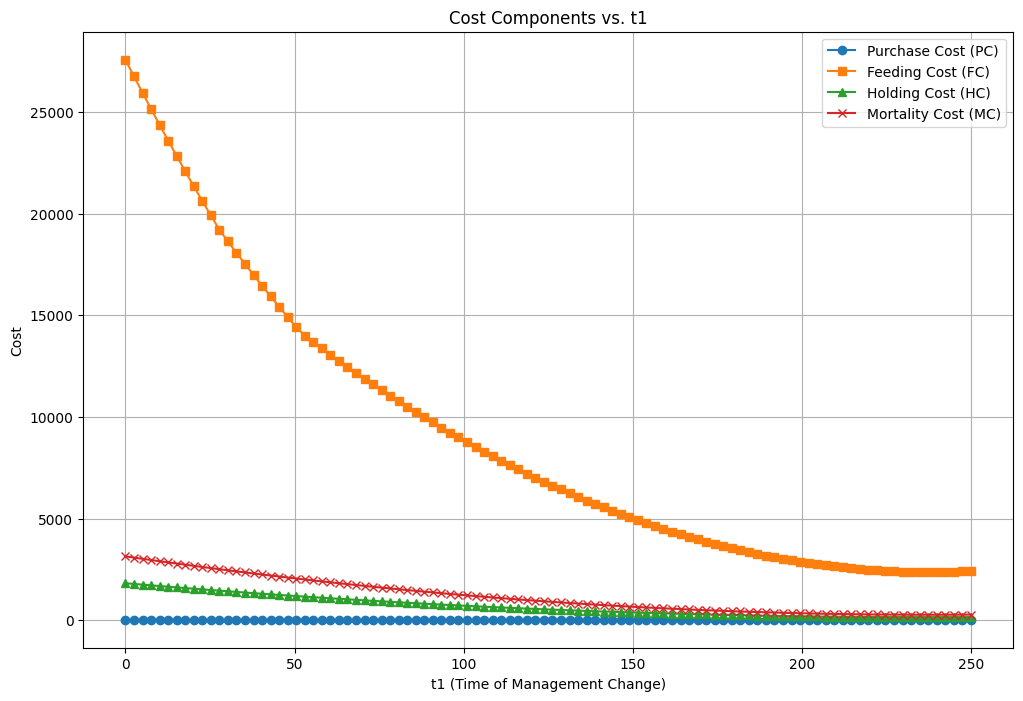

In [ ]:
import matplotlib.pyplot as plt
# ฟังก์ชันคำนวณต้นทุนแต่ละประเภท (Individual Cost Components)
def calculate_costs(t1, T, y):
    # ค่าใช้จ่ายในการสั่งซื้อ
    PC = Cp * y * W0

    # ค่าใช้จ่ายในการให้อาหาร
    FC1 = Cf * (quad(lambda t: 4 * I1(t, y, Ws, b, K, t0, Theta), 0, 28)[0] +
                quad(lambda t: 3 * I1(t, y, Ws, b, K, t0, Theta), 28, 52)[0] +
                quad(lambda t: 1.5 * I1(t, y, Ws, b, K, t0, Theta), 52, t1)[0])
    FC2 = Cf * quad(lambda t: feeding_function(t) * I2(t1, T, Ws, b, K, t0, Theta, Dp), t1, T)[0]
    FC = FC1 + FC2

    # ค่าใช้จ่ายในการเก็บรักษา
    HC1 = Ch * quad(lambda t: I1(t, y, Ws, b, K, t0, Theta), 0, t1)[0]
    HC2 = Ch * quad(lambda t: I2(t1, T, Ws, b, K, t0, Theta, Dp), t1, T)[0]
    HC = HC1 + HC2

    # ค่าใช้จ่ายจากการตาย
    MC1 = Theta * Cm * quad(lambda t: I1(t, y, Ws, b, K, t0, Theta), 0, t1)[0]
    MC2 = Theta * Cm * quad(lambda t: I2(t1, T, Ws, b, K, t0, Theta, Dp), t1, T)[0]
    MC = MC1 + MC2

    return PC, FC, HC, MC

# กำหนดค่า T และ y ที่เหมาะสมจากการคำนวณก่อนหน้า
T = 250  # ค่า T ที่เหมาะสม
y = 10  # ค่า y ที่เหมาะสม

# กำหนดช่วงของ t1 ที่ต้องการพิจารณา
t1_values = np.linspace(0, T, 100)  # ตั้งแต่ t1 = 0 ถึง t1 = T

# คำนวณต้นทุนแต่ละประเภทสำหรับแต่ละค่า t1
PC_values = []
FC_values = []
HC_values = []
MC_values = []

for t1 in t1_values:
    PC, FC, HC, MC = calculate_costs(t1, T, y)
    PC_values.append(PC)
    FC_values.append(FC)
    HC_values.append(HC)
    MC_values.append(MC)

# พล็อตกราฟ
plt.figure(figsize=(12, 8))
plt.plot(t1_values, PC_values, label='Purchase Cost (PC)', marker='o')
plt.plot(t1_values, FC_values, label='Feeding Cost (FC)', marker='s')
plt.plot(t1_values, HC_values, label='Holding Cost (HC)', marker='^')
plt.plot(t1_values, MC_values, label='Mortality Cost (MC)', marker='x')

plt.xlabel('t1 (Time of Management Change)')
plt.ylabel('Cost')
plt.title('Cost Components vs. t1')
plt.legend()
plt.grid(True)
plt.show()


##กราฟ Total Cost vs. y

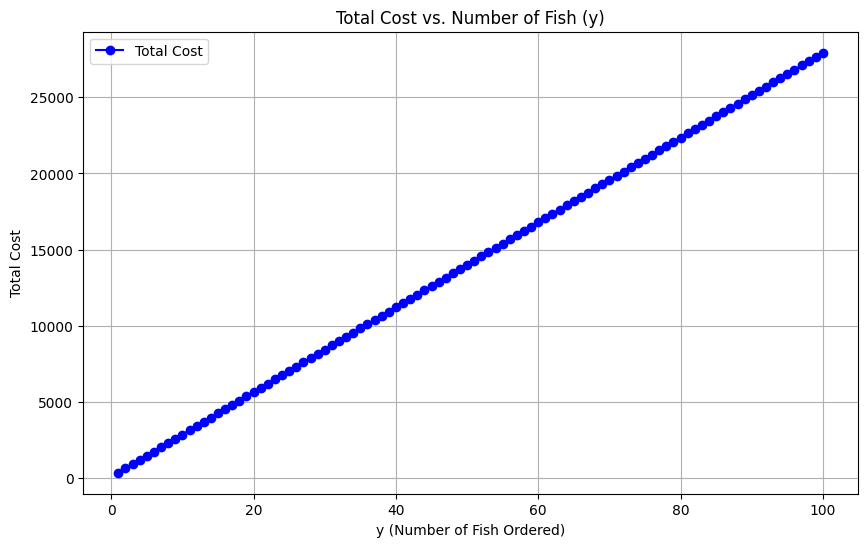

In [ ]:
# กำหนดช่วงของ y ที่ต้องการพิจารณา
y_values = np.linspace(1, 100, 100)  # ตั้งแต่ y = 1 ถึง y = 100 (หรือมากกว่านั้นตามต้องการ)

# คำนวณต้นทุนรวมสำหรับแต่ละค่า y
total_cost_values_y = []

for y in y_values:
    PC, FC, HC, MC = calculate_costs(t1, T, y)
    total_cost = PC + FC + HC + MC
    total_cost_values_y.append(total_cost)

# พล็อตกราฟต้นทุนรวมกับ y
plt.figure(figsize=(10, 6))
plt.plot(y_values, total_cost_values_y, label='Total Cost', marker='o', color='blue')
plt.xlabel('y (Number of Fish Ordered)')
plt.ylabel('Total Cost')
plt.title('Total Cost vs. Number of Fish (y)')
plt.legend()
plt.grid(True)
plt.show()


##กราฟ Total cost vs. T

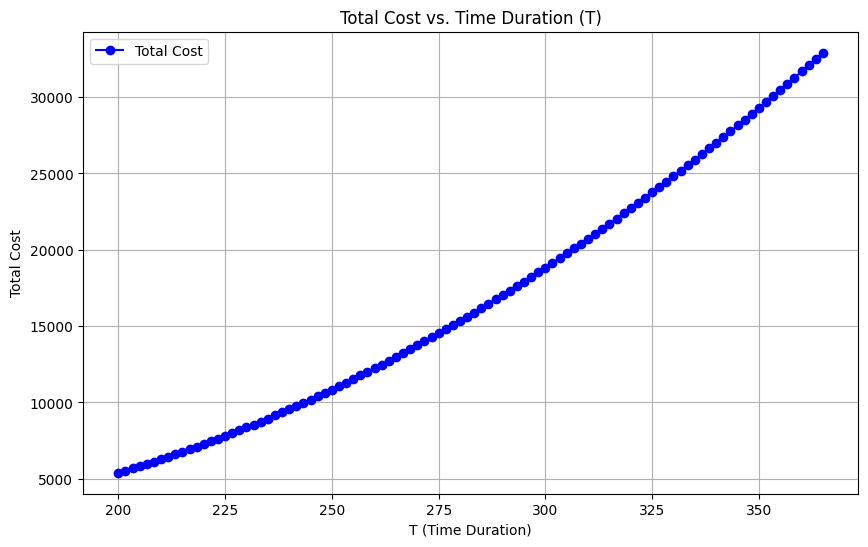

In [ ]:
# กำหนดช่วงของ T ที่ต้องการพิจารณา
T_values = np.linspace(200, 365, 100)  # ตั้งแต่ T = 200 ถึง T = 365

# กำหนดค่า y และ t1 ที่เหมาะสมจากการคำนวณก่อนหน้า
y = 10   # จำนวนปลาที่สั่งซื้อ
t1 = 100  # เวลาเปลี่ยนแปลงการจัดการ

# คำนวณต้นทุนรวมสำหรับแต่ละค่า T
total_cost_values_T = []

for T in T_values:
    PC, FC, HC, MC = calculate_costs(t1, T, y)
    total_cost = PC + FC + HC + MC
    total_cost_values_T.append(total_cost)

# พล็อตกราฟต้นทุนรวมกับ T
plt.figure(figsize=(10, 6))
plt.plot(T_values, total_cost_values_T, label='Total Cost', marker='o', color='blue')
plt.xlabel('T (Time Duration)')
plt.ylabel('Total Cost')
plt.title('Total Cost vs. Time Duration (T)')
plt.legend()
plt.grid(True)
plt.show()


##กราฟ Total Cost vs. Time (T) using Optimal t1 and y

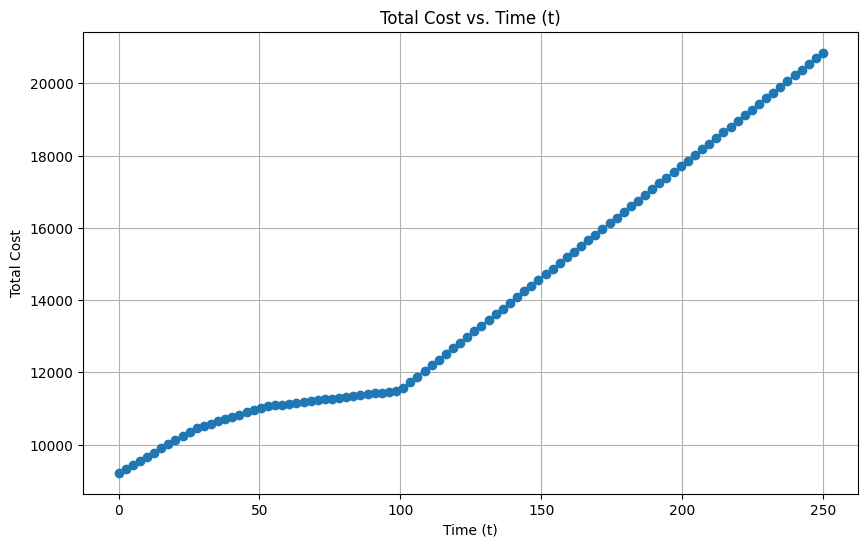

In [ ]:

# ฟังก์ชันต้นทุนรวม (Total Cost) เมื่อเวลาผ่านไป
def total_cost_over_time(t, T, t1, y):
    if t <= t1:
        PC = Cp * y * W0
        FC1 = Cf * (quad(lambda t: 4 * I1(t, y, Ws, b, K, t0, Theta), 0, min(t, 28))[0] +
                    quad(lambda t: 3 * I1(t, y, Ws, b, K, t0, Theta), 28, min(t, 52))[0] +
                    quad(lambda t: 1.5 * I1(t, y, Ws, b, K, t0, Theta), 52, min(t, t1))[0])
        HC1 = Ch * quad(lambda t: I1(t, y, Ws, b, K, t0, Theta), 0, t)[0]
        MC1 = Theta * Cm * quad(lambda t: I1(t, y, Ws, b, K, t0, Theta), 0, t)[0]
        return PC + FC1 + HC1 + MC1 + CC
    else:
        PC = Cp * y * W0
        FC1 = Cf * (quad(lambda t: 4 * I1(t, y, Ws, b, K, t0, Theta), 0, 28)[0] +
                    quad(lambda t: 3 * I1(t, y, Ws, b, K, t0, Theta), 28, 52)[0] +
                    quad(lambda t: 1.5 * I1(t, y, Ws, b, K, t0, Theta), 52, t1)[0])
        FC2 = Cf * quad(lambda t: feeding_function(t) * I2(t1, T, Ws, b, K, t0, Theta, Dp), t1, t)[0]
        HC1 = Ch * quad(lambda t: I1(t, y, Ws, b, K, t0, Theta), 0, t1)[0]
        HC2 = Ch * quad(lambda t: I2(t1, T, Ws, b, K, t0, Theta, Dp), t1, t)[0]
        MC1 = Theta * Cm * quad(lambda t: I1(t, y, Ws, b, K, t0, Theta), 0, t1)[0]
        MC2 = Theta * Cm * quad(lambda t: I2(t1, T, Ws, b, K, t0, Theta, Dp), t1, t)[0]
        return PC + FC1 + HC1 + MC1 + FC2 + HC2 + MC2 + CC

# กำหนดค่า T, t1, และ y ที่เหมาะสมจากการคำนวณก่อนหน้า
T = 250  # ค่า T ที่เหมาะสม
t1 = 100  # ค่า t1 ที่เหมาะสม
y = 10  # ค่า y ที่เหมาะสม

# กำหนดช่วงของ t ที่ต้องการพิจารณา
t_values = np.linspace(0, T, 100)  # ตั้งแต่ t = 0 ถึง t = T

# คำนวณต้นทุนรวมสำหรับแต่ละค่า t
total_cost_values = [total_cost_over_time(t, T, t1, y) for t in t_values]

# พล็อตกราฟ
plt.figure(figsize=(10, 6))
plt.plot(t_values, total_cost_values, marker='o')
plt.xlabel('Time (t)')
plt.ylabel('Total Cost')
plt.title('Total Cost vs. Time (t)')
plt.grid(True)
plt.show()


##กราฟรวมต้นทุนทั้งหมด

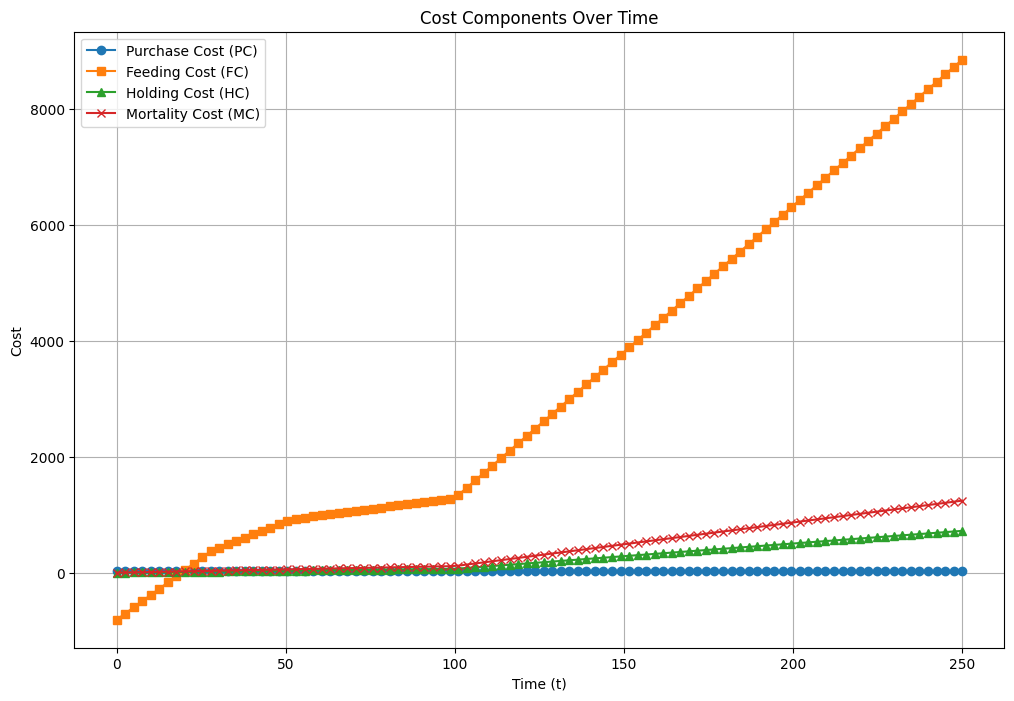

In [ ]:
# ฟังก์ชันการให้อาหาร (Feeding function)
def feeding_function(t):
    return 4 if t <= 28 else 3 if t <= 52 else 1.5

# ฟังก์ชันคำนวณต้นทุนแต่ละประเภท (Individual Cost Components)
def calculate_costs(t, T, t1, y):
    # ค่าใช้จ่ายในการสั่งซื้อ
    PC = Cp * y * W0

    # ค่าใช้จ่ายในการให้อาหาร
    if t <= t1:
        FC = Cf * (quad(lambda t: 4 * I1(t, y, Ws, b, K, t0, Theta), 0, min(t, 28))[0] +
                   quad(lambda t: 3 * I1(t, y, Ws, b, K, t0, Theta), 28, min(t, 52))[0] +
                   quad(lambda t: 1.5 * I1(t, y, Ws, b, K, t0, Theta), 52, min(t, t1))[0])
        HC = Ch * quad(lambda t: I1(t, y, Ws, b, K, t0, Theta), 0, t)[0]
        MC = Theta * Cm * quad(lambda t: I1(t, y, Ws, b, K, t0, Theta), 0, t)[0]
    else:
        FC1 = Cf * (quad(lambda t: 4 * I1(t, y, Ws, b, K, t0, Theta), 0, 28)[0] +
                    quad(lambda t: 3 * I1(t, y, Ws, b, K, t0, Theta), 28, 52)[0] +
                    quad(lambda t: 1.5 * I1(t, y, Ws, b, K, t0, Theta), 52, t1)[0])
        FC2 = Cf * quad(lambda t: feeding_function(t) * I2(t1, T, Ws, b, K, t0, Theta, Dp), t1, t)[0]
        FC = FC1 + FC2
        HC1 = Ch * quad(lambda t: I1(t, y, Ws, b, K, t0, Theta), 0, t1)[0]
        HC2 = Ch * quad(lambda t: I2(t1, T, Ws, b, K, t0, Theta, Dp), t1, t)[0]
        HC = HC1 + HC2
        MC1 = Theta * Cm * quad(lambda t: I1(t, y, Ws, b, K, t0, Theta), 0, t1)[0]
        MC2 = Theta * Cm * quad(lambda t: I2(t1, T, Ws, b, K, t0, Theta, Dp), t1, t)[0]
        MC = MC1 + MC2

    return PC, FC, HC, MC

# กำหนดค่า T, t1, และ y ที่เหมาะสมจากการคำนวณก่อนหน้า
T = 250  # ค่า T ที่เหมาะสม
t1 = 100  # ค่า t1 ที่เหมาะสม
y = 10  # ค่า y ที่เหมาะสม

# กำหนดช่วงของ t ที่ต้องการพิจารณา
t_values = np.linspace(0, T, 100)  # ตั้งแต่ t = 0 ถึง t = T

# คำนวณต้นทุนแต่ละประเภทสำหรับแต่ละค่า t
PC_values = []
FC_values = []
HC_values = []
MC_values = []

for t in t_values:
    PC, FC, HC, MC = calculate_costs(t, T, t1, y)
    PC_values.append(PC)
    FC_values.append(FC)
    HC_values.append(HC)
    MC_values.append(MC)

# พล็อตกราฟ
plt.figure(figsize=(12, 8))
plt.plot(t_values, PC_values, label='Purchase Cost (PC)', marker='o')
plt.plot(t_values, FC_values, label='Feeding Cost (FC)', marker='s')
plt.plot(t_values, HC_values, label='Holding Cost (HC)', marker='^')
plt.plot(t_values, MC_values, label='Mortality Cost (MC)', marker='x')

plt.xlabel('Time (t)')
plt.ylabel('Cost')
plt.title('Cost Components Over Time')
plt.legend()
plt.grid(True)
plt.show()


#example

In [ ]:
import numpy as np
from scipy.optimize import minimize

# กำหนดค่าพารามิเตอร์
w0 = 45
h = 0.002
p = 0.01
Cf = 0.0001
K = 5000
A = 6870.2
b = -0.043
k = 0.036
n = -0.0087
b0 = 532.2
b1 = 67.15
b2 = -0.651
b3 = 0.0018
g = 0.005
l = 0.1
t1 = 7
d = 6500000
f = 45000

# ฟังก์ชันเป้าหมาย (Objective Function)
def objfun(x):
    y = x[0]
    t2 = x[1]
    s = x[2]

    profit = (
        (s * y * (1 - l) * A * (1 + (b * np.exp(-k * t2))) ** (-1 / n))
        - ((p * y * w0)
           + (Cf * y * ((2 - l) / 2) * (b0 * t1 + b1 * (t1 ** 2) / 2 + b2 * (t1 ** 3) / 3 + b3 * (t1 ** 4) / 4))
           + (y * l * g)
           + (Cf * y * (1 - l) * ((b0 * t2 + b1 * (t2 ** 2) / 2 + b2 * (t2 ** 3) / 3 + b3 * (t2 ** 4) / 4)
                                  - (b0 * t1 + b1 * (t1 ** 2) / 2 + b2 * (t1 ** 3) / 3 + b3 * (t1 ** 4) / 4)))
           + (h * ((d / 2) * (((y * (1 - l) * A * (1 + (b * np.exp(-k * t2))) ** (-1 / n) + d * t2 - f * s * t2) / (d - f * s)) ** 2)
                    - ((f * s / 2) * (((y * (1 - l) * A * (1 + (b * np.exp(-k * t2))) ** (-1 / n) + d * t2 - f * s * t2) / (d - f * s)) ** 2))
                    + ((d / 2) * t2 ** 2) - ((f * s / 2) * t2 ** 2) - d * t2 * ((y * (1 - l) * A * (1 + (b * np.exp(-k * t2))) ** (-1 / n) + d * t2 - f * s * t2) / (d - f * s))
                    + f * s * t2 * ((y * (1 - l) * A * (1 + (b * np.exp(-k * t2))) ** (-1 / n) + d * t2 - f * s * t2) / (d - f * s))))
           + K)
    )
    return -profit  # เนื่องจากเราต้องการหากำไรสูงสุด เราจึงต้องใส่เครื่องหมายลบเพื่อทำให้ minimize หา maximum

# ขอบเขตของตัวแปร (Bounds)
bounds = [(1, 100000000), (28, 60), (0.001, 0.01)]  # lb <= x <= ub

# ค่าเริ่มต้น (Initial Guess)
x0 = [1, 28, 0.001]

# เรียกใช้ scipy.optimize เพื่อหาค่าที่เหมาะสม
result = minimize(objfun, x0, bounds=bounds, method='L-BFGS-B')

# แสดงผลลัพธ์
print("Optimal Parameters:")
print("y:", result.x[0])
print("t2:", result.x[1])
print("s:", result.x[2])
print("Maximum Profit:", -result.fun)  # ใส่เครื่องหมายลบกลับเพื่อแสดงกำไรสูงสุด


Optimal Parameters:
y: 6468.502529257408
t2: 58.98238200187879
s: 0.01
Maximum Profit: 74275.72892060963
